In [15]:
class Person:
    xxx = 123
    def foo(self):  #类属性foo，也是方法 self指代当前实例本身
        print('foo')
    @classmethod
    def class_method(cls,*,a,b):
        print('class= {0.__name__}({0})'.format(cls))
        print('{}.xxx={}'.format(cls.__name__, cls.xxx))
        cls.HEIGHT=170
    @staticmethod  # 静态方法
    def staticmtd(a):  #如果不添加参数呢
        print('static', '{}={}'.format(Person.__name__, a))

Person.class_method(a=1,b=2)
print(Person.__dict__ )
print(Person.HEIGHT)
print("===================")
a=Person()
a.staticmtd('tom')

class= Person(<class '__main__.Person'>)
Person.xxx=123
{'__module__': '__main__', 'xxx': 123, 'foo': <function Person.foo at 0x0000000006C8ABF8>, 'class_method': <classmethod object at 0x0000000006C9BF98>, 'staticmtd': <staticmethod object at 0x0000000006C99048>, '__dict__': <attribute '__dict__' of 'Person' objects>, '__weakref__': <attribute '__weakref__' of 'Person' objects>, '__doc__': None, 'HEIGHT': 170}
170
static Person=tom


In [21]:
class MyClass:
    xxx = 'XXX'
    @classmethod
    def clsmtd(cls):
        print('{}.xxx={}'.format(cls.__name__,cls.xxx))

In [22]:
MyClass.clsmtd()

MyClass.xxx=XXX


In [25]:
class Person:
    @classmethod
    def clsmtd(cls):
        print('class={0.__name__}({0})'.format(cls))
        cls.HEIGHT=170

In [26]:
Person.clsmtd()

class=Person(<class '__main__.Person'>)


In [27]:
Person.__dict__

mappingproxy({'__module__': '__main__',
              'clsmtd': <classmethod at 0x6f2d400>,
              '__dict__': <attribute '__dict__' of 'Person' objects>,
              '__weakref__': <attribute '__weakref__' of 'Person' objects>,
              '__doc__': None,
              'HEIGHT': 170})

In [28]:
(Person)

__main__.Person

In [2]:
class Person:
    def nornal_method():
        print('normal')
    def method(self):
        print("{}'s method ".format(self))
    @classmethod
    def class_method(cls):
        print('class={0.__name__}({0})'.format(cls))
        cls.HEIGHT=170
    @staticmethod
    def static_methd():
        print(Person.HEIGHT)

In [3]:
print(Person.nornal_method)

<function Person.nornal_method at 0x00000000069AB6A8>


In [4]:
Person.method()

TypeError: method() missing 1 required positional argument: 'self'

In [5]:
tom=Person()

In [6]:
tom.nornal_method()

TypeError: nornal_method() takes 0 positional arguments but 1 was given

In [7]:
tom.method()

<__main__.Person object at 0x0000000006464048>'s method 


In [1]:
tom.class_method()

NameError: name 'tom' is not defined

In [8]:
tom.__dict__

{}

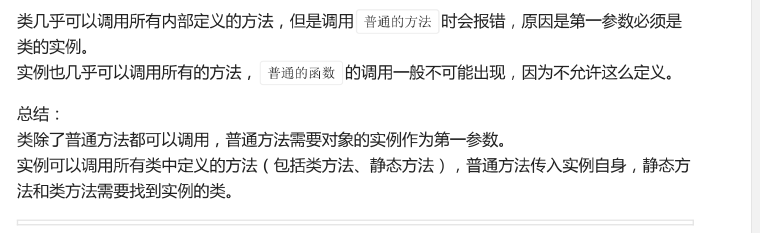


In [14]:
import random

In [50]:
print([random.randint(1,10) for x in range(10)])

[2, 3, 9, 5, 9, 2, 5, 2, 5, 5]


In [48]:
list(a)

[5, 9, 8, 2, 5, 3, 2, 5, 9, 6]

In [51]:
(tom)

### 随机生成整数类：可以指定一批生成的个数，可以指定数值的范围,可以调整每批生成数的个数

In [10]:
import random

### 方法1

In [13]:
class RandomGen:
    def __init__(self,start=0,stop=100,count=10):
        self.start=start
        self.stop=stop
        self.count=count
    def creat(self):
        return [random.randint(self.start,self.stop) for  x in range(self.count)]

In [18]:
a=RandomGen()

In [19]:
a.creat()#用实例方法可以记得每批生成的值

[54, 22, 82, 54, 97, 41, 96, 90, 28, 33]

### 方法2

In [22]:
class RandomGen:
    @classmethod
    def creat(cls,start=0,stop=100,count=10):
        return [random.randint(start,stop) for  x in range(count)]

In [23]:
RandomGen.creat()

[78, 92, 8, 58, 24, 90, 53, 61, 11, 57]

### 方法三

In [66]:
class RandomGenerator:
    def __init__(self,start=0,stop=100,count=10):
        self.start=start
        self.stop=stop
        self.count=count
        self.gen=self._generator()
    def _generator(self):
        while True:
            yield random.randint(self.start,self.stop)
    def generator(self):
            return [next(self.gen) for _ in range(self.count)]
        

In [67]:
a=RandomGenerator()

In [69]:
a.generator()#next(_generator())

[64, 15, 66, 78, 12, 71, 96, 12, 60, 17]

In [78]:
def fun():
    while True:
        yield [next(random.randint(0,100)) for _ in range(10)]

### 改进


In [30]:
class RandomGenerator:
    def __init__(self,start=0,stop=100,count=10):
        self.start=start
        self.stop=stop
        self.count=count
        self.gen=self._generator()
    def _generator(self):
        while True:
            yield [random.randint(self.start,self.stop) for _ in range(self.count)] 
    def generator(self,patch):
        self.count=patch
        return next(self.gen)

In [31]:
def fun():
    while True:
            yield [random.randint(0,100) for _ in range(10)] 

In [32]:
a=RandomGenerator()

In [33]:
a.generator(10)

[30, 9, 55, 70, 21, 24, 8, 14, 50, 50]

In [34]:
print('=*'*10 + "*zip()函数" + '=*'*10)
m = [[1, 2, 3],  [4, 5, 6],  [7, 8, 9]]
n = [[2, 2, 2],  [3, 3, 3],  [4, 4, 4]]
print("*zip(m, n)返回:\n", *zip(m, n))
m2, n2 = zip(*zip(m, n))

=*=*=*=*=*=*=*=*=*=**zip()函数=*=*=*=*=*=*=*=*=*=*
*zip(m, n)返回:
 ([1, 2, 3], [2, 2, 2]) ([4, 5, 6], [3, 3, 3]) ([7, 8, 9], [4, 4, 4])


## 使用上面的类，随即生成20个数字，两两配对形成二维坐标系的坐标，把这些坐标组织起来，并输出打印

In [48]:
class Point:
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def __repr__(self):
        return '{}:{}'.format(self.x,self.y)


In [49]:
lst = [Point(*v) for v in zip(a.generator(10),a.generator(10))]

In [50]:
print(lst)

[23:39, 0:19, 75:12, 90:41, 85:66, 90:62, 52:20, 47:2, 61:8, 91:82]


In [167]:
class Car:
    def __init__(self,mark,speed,color,price):
        self.mark=mark
        self.speed=speed
        self.color=color
        self.price=price

class CarInfo:
    def __init__(self):
        self.info=[]
    def addcar(self,car:Car):#注意类的注释
        self.info.append(car)
    def getall(self):
        return self.info


In [170]:
ci=CarInfo()
car=Car('audi',400,'red',100)
ci.addcar([car.mark,car.speed,car.price])
ci.getall()

[['audi', 400, 100]]

In [145]:
car.__dict__

{'mark': 'audi', 'speed': 400, 'color': 'red', 'price': 100}

In [146]:
ci.addcar(car)
ci.getall()

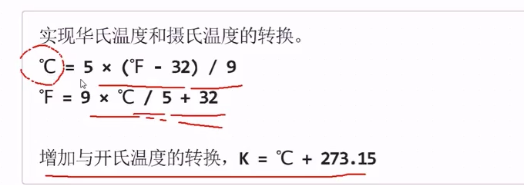


In [61]:
def fun(list):
    if list==None:
        print("list is none")
    

In [71]:
a=None

In [72]:
a is None

True

In [94]:
class Temperature:
    def __init__(self,t,unit='c'):
        self.c = None  #为什么不变为私有属性就不能用
        self.f = None
        self.k = None
        if unit=='2':
            self.k=t
            self.c=self.k2c(t)
        elif unit =='f':
            self.f=t
            self.c=self.f2c(t)
        else:
            self.c=t

    @property
    def c(self):
        return self.c
    @property
    def k(self):
        if self.k is None: #考虑为什么不用==
            self.k=self.k2c(self.c)
        return self.k
    @property
    def f(self):
        if self.f is None:
            self.f=self.f2c(self.c)
        return self.f

    @classmethod
    def c2f(cls,c):
        return 9*c/5+32
    @classmethod
    def c2k(cls,c):
        return c+273.15
    @classmethod
    def f2c(cls,c):
        return 5*(c-32)/9
    @classmethod
    def f2k(cls,c):
        return cls.c2k(cls.f2c())
    @classmethod
    def k2c(cls,c):
        return c-273.15

In [87]:
a=Temperature(38)

AttributeError: can't set attribute

In [88]:
a=None

In [91]:
print(a)

None


In [95]:
class Temperature:
    def __init__(self,t,unit='c'):
        self._c = None
        self._f = None
        self._k = None
        if unit=='k':
            self._k=t
            self._c=self.k2c(t)
        elif unit =='f':
            self._f=t
            self. _c=self.f2c(t)
        else:
            self._c=t


In [96]:
class Temperature:
    def __init__(self,t,unit='c'):
        self._c = None  #不加下划线为什么不能调用
        self._f = None
        self._k = None
        if unit=='k':
            self._k=t
            self._c=self.k2c(t)
        elif unit =='f':
            self._f=t
            self. _c=self.f2c(t)
        else:
            self._c=t

    @property
    def c(self):
        return self._c
    @property
    def k(self):
        if self._k is None: #考虑为什么不用==
            self._k=self.k2c(self._c)
        return self._k
    @property
    def f(self):
        if self._f is None:
            self._f=self.f2c(self._c)
        return self._f

    @classmethod
    def c2f(cls,c):
        return 9*c/5+32
    @classmethod
    def c2k(cls,c):
        return c+273.15
    @classmethod
    def f2c(cls,c):
        return 5*(c-32)/9
    @classmethod
    def f2k(cls,c):
        return cls.c2k(cls.f2c())
    @classmethod
    def k2c(cls,c):
        return c-273.15

In [97]:
a=Temperature(39)
print(a.k)

-234.14999999999998
